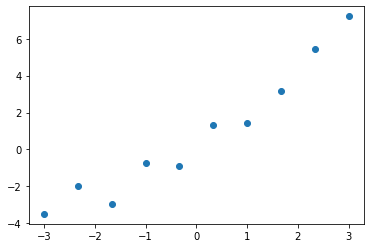

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 10)
noize = np.random.normal(size=x.shape)
y = 1 + 2 * x + noize
plt.plot(x, y, 'o')
plt.show()

In [3]:
def prob(x, y, al, bt, si=1.):
    y_pred = al + bt * x
    return np.exp(-(y-y_pred)**2/(2*si**2)) / np.sqrt(2*np.pi*si**2)

def log_prob(x, y, al, bt, si=1.):
    y_pred = al + bt * x
    return -(y-y_pred)**2/(2*si**2) - 0.5 * np.log(2*np.pi*si**2)

def L(x, y, al, bt, si=1.):
    joint_prob = 1.
    for x_, y_ in zip(x, y):
        joint_prob *= prob(x_, y_, al, bt, si=1.)
    return joint_prob 

def l(x, y, al, bt, si=1.):
    log_joint_prob = 0.
    for x_, y_ in zip(x, y):
        log_joint_prob += log_prob(x_, y_, al, bt, si=1.)
    return log_joint_prob

In [5]:
L(x, y, al=1., bt=2., si=1.)

3.842806188332079e-07

In [4]:
l(x, y, al=1., bt=2., si=1.)

-14.771892773035587

In [4]:
al_list = np.linspace(0,3,100)
bt_list = np.linspace(0,3,100)

In [5]:
AL_list, BT_list = np.meshgrid(al_list, bt_list) 
l_list = []
for al_, bt_ in zip(AL_list.reshape((-1,)), BT_list.reshape((-1,))):
    l_list.append(l(x, y, al=al_, bt=bt_, si=1.))
l_list = np.array(l_list).reshape(AL_list.shape)

In [6]:
print(AL_list)
print(BT_list)
print(l_list)

[[0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 ...
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03030303 0.03030303 0.03030303 ... 0.03030303 0.03030303 0.03030303]
 [0.06060606 0.06060606 0.06060606 ... 0.06060606 0.06060606 0.06060606]
 ...
 [2.93939394 2.93939394 2.93939394 ... 2.93939394 2.93939394 2.93939394]
 [2.96969697 2.96969697 2.96969697 ... 2.96969697 2.96969697 2.96969697]
 [3.         3.         3.         ... 3.         3.         3.        ]]
[[ -92.80659913  -92.53166646  -92.26591653 ... -108.89295135
  -109.50874412 -110.13371963]
 [ -90.56920162  -9

<IPython.core.display.Javascript object>


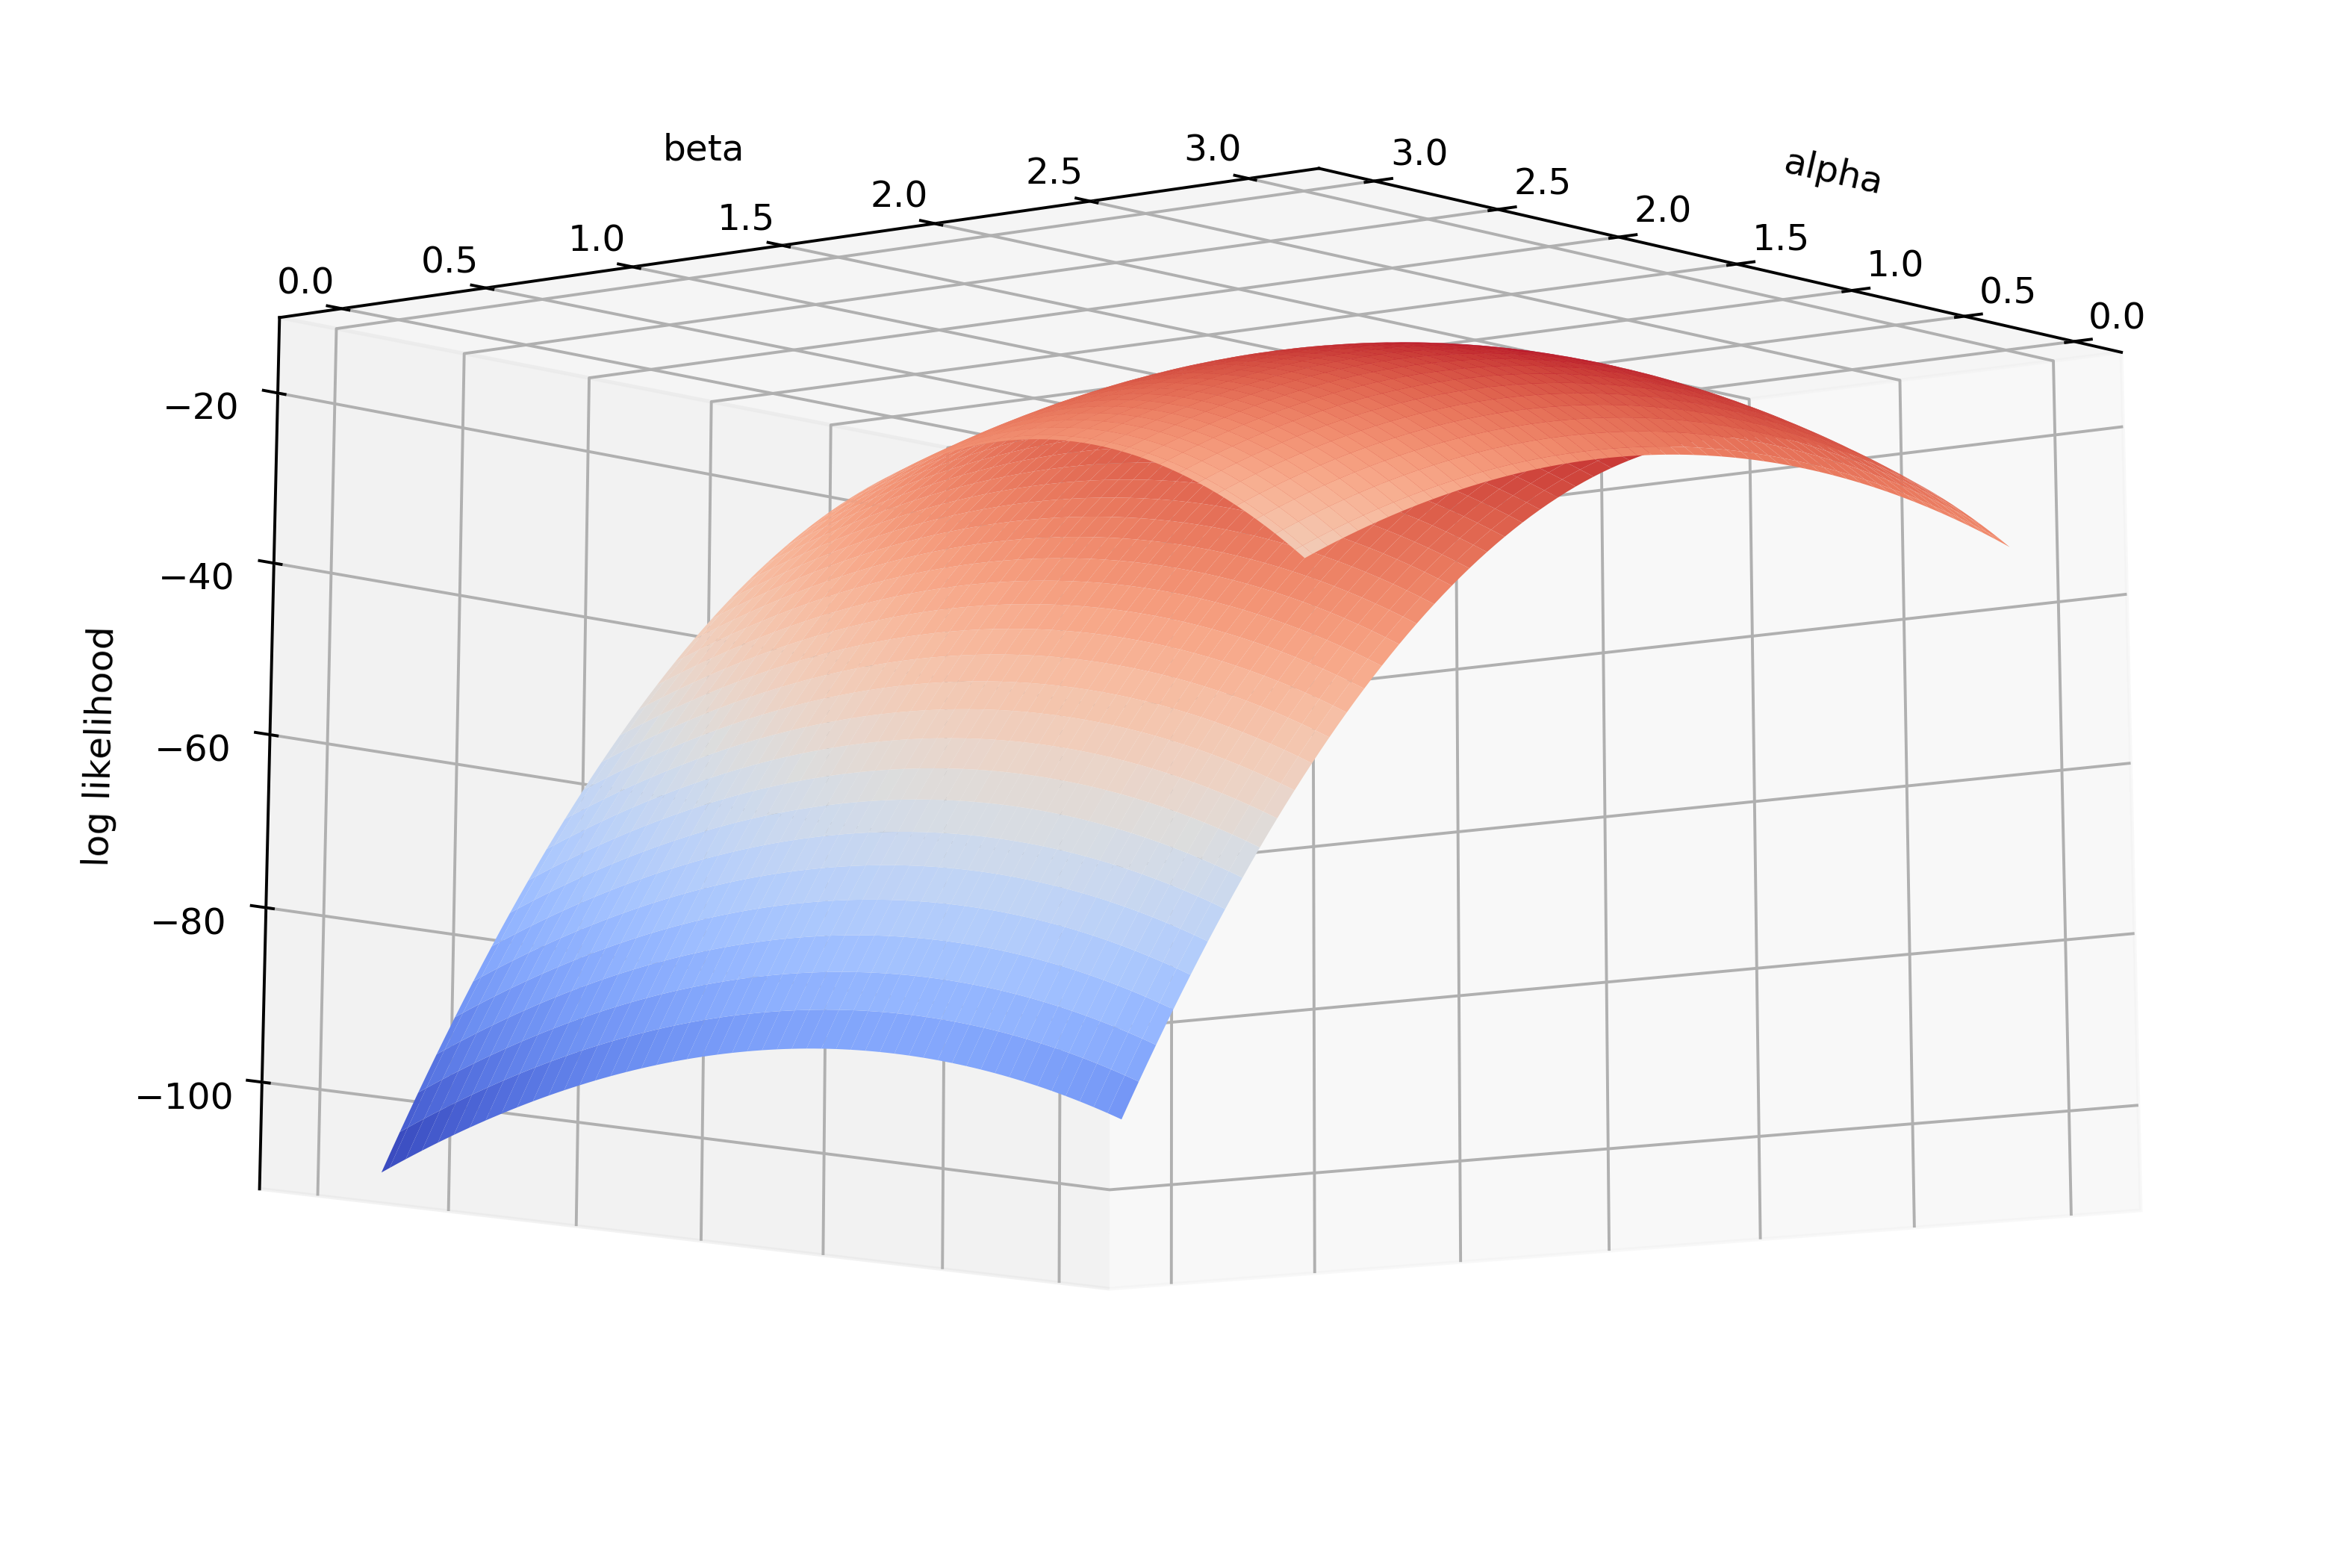

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D  # <-- Note the capitalization! 
fig = plt.figure(figsize=(9, 6))
ax = Axes3D(fig)  # <-- Note the difference from your original code...
ax.plot_surface(AL_list, BT_list, l_list,
                rstride=2,
                cstride=2,
                cmap=mpl.cm.coolwarm,
                linewidth=0.5,
                antialiased=True)
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('log likelihood')
plt.show()

In [8]:
idx = np.unravel_index(np.argmax(l_list), l_list.shape)
print(np.argmax(l_list))
print(idx)
print(AL_list[idx])
print(BT_list[idx])
print(l_list[idx])

6730
(67, 30)
0.9090909090909092
2.0303030303030303
-13.091921079272721
